## Building a Convolutional Neural Network to classify images in the CIFAR-10 Dataset
CIFAR-10 is a well-known dataset for image classification. The CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
For details about CIFAR-10 are available here: https://www.cs.toronto.edu/~kriz/cifar.html

For a compilation of published performance results on CIFAR 10, refer to: http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

## Building Convolutional Neural Nets
In this exercise we will build and train our first convolutional neural networks (CNN). In the first part, we walk through the different layers and how they are configured. In the second part, you will build your own model, train it, and compare the performance.

In [2]:
# Import the required libraries

import keras
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop

In [6]:
# for classification
## Shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [7]:
## Each image is a 32 x 32 x 3 numpy array

x_train[444].shape


(32, 32, 3)

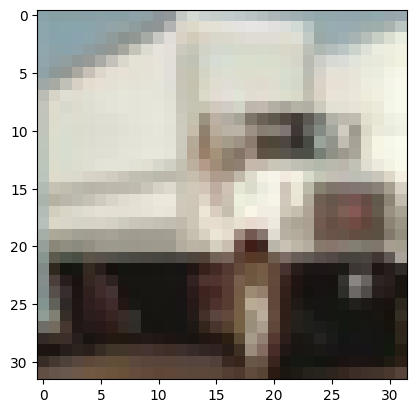

In [9]:
## Let's look at one of the images
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[444])


In [10]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
# instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [12]:
# # Let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Keras Layers for CNNs
- Previously we built Neural Networks using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output.
- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `input_shape`: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.


## First CNN
Below we will build our first CNN.  For demonstration purposes to train it faster, it is not very deep and has relatively few parameters.  We use strides of 2 in the first two convolutional layers which quickly reduces the dimensions of the output.  After a MaxPooling layer, we flatten, and then have a single fully connected layer before our final classification layer.

In [13]:
# Build a CNN using Keras' Sequential capabilities

model_1 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                   input_shape=x_train.shape[1:]))

# activation
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32,(5,5),strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3x3x32
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))                      # dropout rate

## Flatten turns 3x3x32 into 3072x1
model_1.add(Flatten())
model_1.add(Dense(512))

# activation
model_1.add(Activation('relu'))

model_1.add(Dropout(0.5))

model_1.add(Dense(num_classes))

# activation
model_1.add(Activation('softmax'))

# Show the summary
model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,162 (707.66 KB)

 Trainable params: 181,162 (707.66 KB)

 Non-trainable params: 0 (0.00 B)

We still have 181K parameters, even though this is a "small" model.



In [15]:
# Import the library

# Batch size
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

model_1.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=15,
            validation_data=(x_test, y_test),
            shuffle=True)


/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.2903 - loss: 1.9208 - val_accuracy: 0.4644 - val_loss: 1.4733
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.4524 - loss: 1.5106 - val_accuracy: 0.5094 - val_loss: 1.3608
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.5024 - loss: 1.3857 - val_accuracy: 0.5419 - val_loss: 1.2950
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5347 - loss: 1.3016 - val_accuracy: 0.5655 - val_loss: 1.2233
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.5551 - loss: 1.2473 - val_accuracy: 0.5881 - val_loss: 1.1409
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.5765 - loss: 1.1938 - val_accuracy: 0.5820 - val_loss: 1.1888
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.5863 - loss: 1.1762 - val_accuracy: 0.5916 - val_loss: 1.1491
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6062 -

## Exercise
Our previous model had the structure:

Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

(with appropriate activation functions and dropouts)

Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

Use strides of 1 for all convolutional layers.

How many parameters does your model have? How does that compare to the previous model?

Train it for 5 epochs. What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

Try different structures and run times, and see how accurate your model can be.

In [17]:
# Build a CNN using Keras' Sequential capabilities
# Let's build a CNN using Keras' Sequential capabilities
model_2 = Sequential()

# Conv2D layer
model_2.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
# MaxPooling2D
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
# Conv2D
model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
# Conv2D
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
# MaxPooling2D
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
# Flatten
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
## Check number of parameters
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# initiate RMSprop optimizer
opt_2 = keras.optimizers.RMSprop(learning_rate=0.0005)
# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
                optimizer=opt_2,
                metrics=['accuracy'])

In [20]:
model_2.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=5,
            validation_data=(x_test, y_test),
            shuffle=True)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 212s 134ms/step - accuracy: 0.3241 - loss: 1.8356 - val_accuracy: 0.5734 - val_loss: 1.2059
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 255s 130ms/step - accuracy: 0.5606 - loss: 1.2422 - val_accuracy: 0.6271 - val_loss: 1.0604
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 129ms/step - accuracy: 0.6387 - loss: 1.0318 - val_accuracy: 0.6905 - val_loss: 0.8906
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 130ms/step - accuracy: 0.6856 - loss: 0.9104 - val_accuracy: 0.6909 - val_loss: 0.9055
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 262s 130ms/step - accuracy: 0.7111 - loss: 0.8360 - val_accuracy: 0.6709 - val_loss: 1.0013
